In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import os
import pandas as pd
import datetime


import datetime as dt
date_fmt ='%Y%m%d'

TICKER = 'CNDA'
MKTCAP = 72e6 # outstanding shares

In [2]:
def get_df(sdir, NAME, raw_x, TICKER ):
    '''
    This function iterates through RegSHO data over a data range and pulls rows for a TICKER and
    puts the data into a pandas data frame
    a row is as follows. The consolodated daily short data is in the CNMSyyyymmdd.txt file for every trade day
    
    Date|Symbol|ShortVolume|ShortExemptVolume|TotalVolume|Market
    
    '''
    xxx = []
    for shortdate in raw_x:
        #print(shortdate)
        for file in os.listdir(sdir):
            matchme = prefix+str(shortdate)+'*'
            if fnmatch.fnmatch(file, matchme):
                xxx.append(file)

    df = None            


    for filename in xxx:
        f = open(sdir+filename)
        try:
            fullfile = pd.read_csv(f,sep="|")
            if df is None:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = tickerrow

            else:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = df.append(tickerrow)
        except:
            print('failed: {}'.format(filename))
    return df

In [3]:
# Generate dates to pull logs with
# We need to convert the Date time to YYYYMMDD as that is the format
# dates here are max values that are available. The earliest data I have is 20190102
x = pd.date_range(start='20090101',end='20240101',freq='D').strftime('%Y%m%d')

# this is the location of where I downloaded the data. REPLACE this with where you have your data 
sdir =  '/home/pookie/git/shorts/shortvolume/shortdata/'

df_dict ={}
basenames = ['CNMS','FNQC','FNRA','FNSQ','FNYX']
#prefix = 'CNMSshvol' # NMS
#prefix = 'FNQCshvol' # NMS
#prefix = 'FNRAshvol' # NMS
#prefix = 'FNSQshvol' # NMS
#prefix = 'FNYXshvol' # NMS
for basename in basenames:
    print(basename)
    prefix = basename+'shvol'
    sdir =  '/home/pookie/git/shorts/shortvolume/shortdata/'+basename+'/'
    df = get_df(sdir, prefix, x, TICKER)
    df_dict[basename] = df

# might not work. It doesnt. 
#raw_x = df['Date']
#df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]



CNMS
FNQC
FNRA
FNSQ
failed: FNSQshvol20101122.txt
FNYX


In [4]:
df_dict
#plt.plot(df_dt, df_dict['FNRA'])

{'CNMS':           Date Symbol  ShortVolume  ShortExemptVolume  TotalVolume Market
 1396  20171229   CNDA       4600.0                0.0       8727.0    Q,N
 1849  20211022   CNDA        140.0                0.0        140.0      N
 1885  20211025   CNDA         24.0                0.0        143.0    B,N
 1878  20211026   CNDA       2714.0                0.0       2726.0    Q,N
 1866  20211028   CNDA         51.0                0.0         54.0      N
 1887  20211029   CNDA        240.0                0.0        251.0  B,Q,N
 1914  20211101   CNDA          1.0                0.0          1.0      Q
 1875  20211103   CNDA     152166.0                0.0     401039.0    Q,N
 1895  20211104   CNDA       2625.0                0.0       2645.0      Q
 1894  20211105   CNDA        508.0                0.0      13228.0    Q,N
 1911  20211108   CNDA        300.0                0.0      56365.0    Q,N
 1877  20211109   CNDA         23.0                0.0         61.0    Q,N
 1885  20211110  

CNMS 1
success
FNQC 2
success
FNRA 3
success
FNSQ 4
success
FNYX 5
success


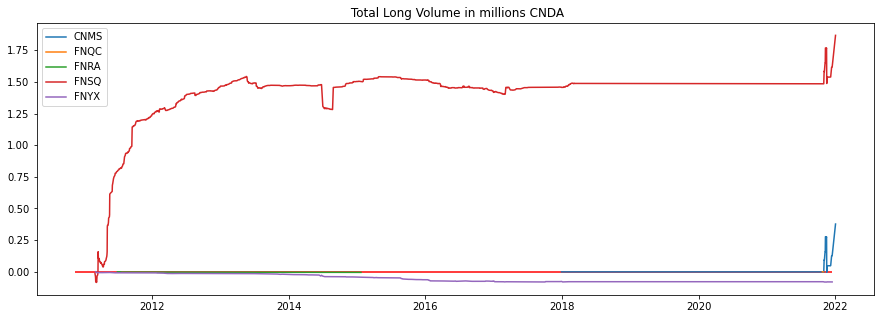

In [5]:
plt.figure(figsize=(15,5))

df_list = None
idx = 0 
for basename in basenames:
    idx = idx+1
    print(basename,idx)
    
    try:
        print('success')
        df_lv = None
        df = df_dict[basename]
        
        df_tv = df['TotalVolume']
        df_svn = df['ShortVolume']
        df_sve = df['ShortExemptVolume']
        df_sv = df_svn + df_sve
        df_lv = df_tv - 2*df_sv

        c_df_tv = np.cumsum(df_tv)
        c_df_sv = np.cumsum(df_sv)
        c_df_lv = np.cumsum(df_tv-2*df_sv)

        
        raw_x = df['Date']
        df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]

        
        if df_lv is None:
            print('None')
        
        plt.plot(df_dt,c_df_lv/1e6,label=basename)
    except:
        print('{}: fail'.format(basename))

plt.hlines(y=0, xmin=df_dt[0], xmax=df_dt[-1],color='r')

plt.title(' Total Long Volume in millions {}'.format(TICKER))
plt.legend()

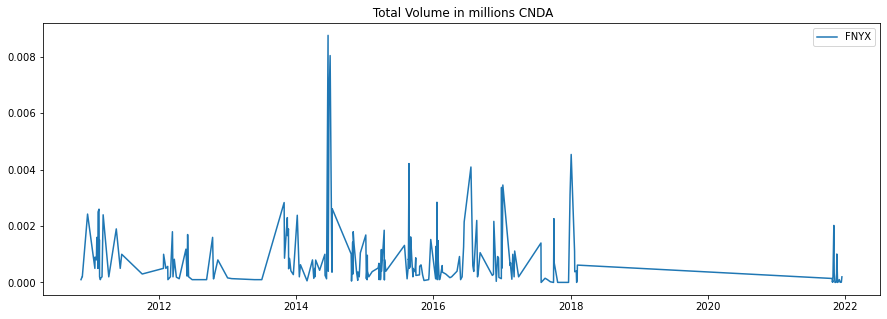

In [6]:
plt.figure(figsize=(15,5))

for basename in basenames:
    try:
        df = df_dict[basename]
        df_tv = df['TotalVolume']
        plt.plot(df_dt,df_tv/1e6,label=basename)
    except:
        pass

plt.title(' Total Volume in millions {}'.format(TICKER))
plt.legend() 

In [7]:
df_dict['CNMS']
df = df_dict['CNMS']
df_tv = df['TotalVolume']
df_svn = df['ShortVolume']
df_sve = df['ShortExemptVolume']
df_sv = df_svn + df_sve
df_lv = df_tv - 2*df_sv

c_df_tv = np.cumsum(df_tv)
c_df_sv = np.cumsum(df_sv)
c_df_lv = np.cumsum(df_tv-2*df_sv)

raw_x = df['Date']
df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]


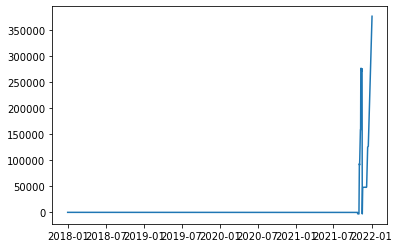